In [4]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, 'Density')

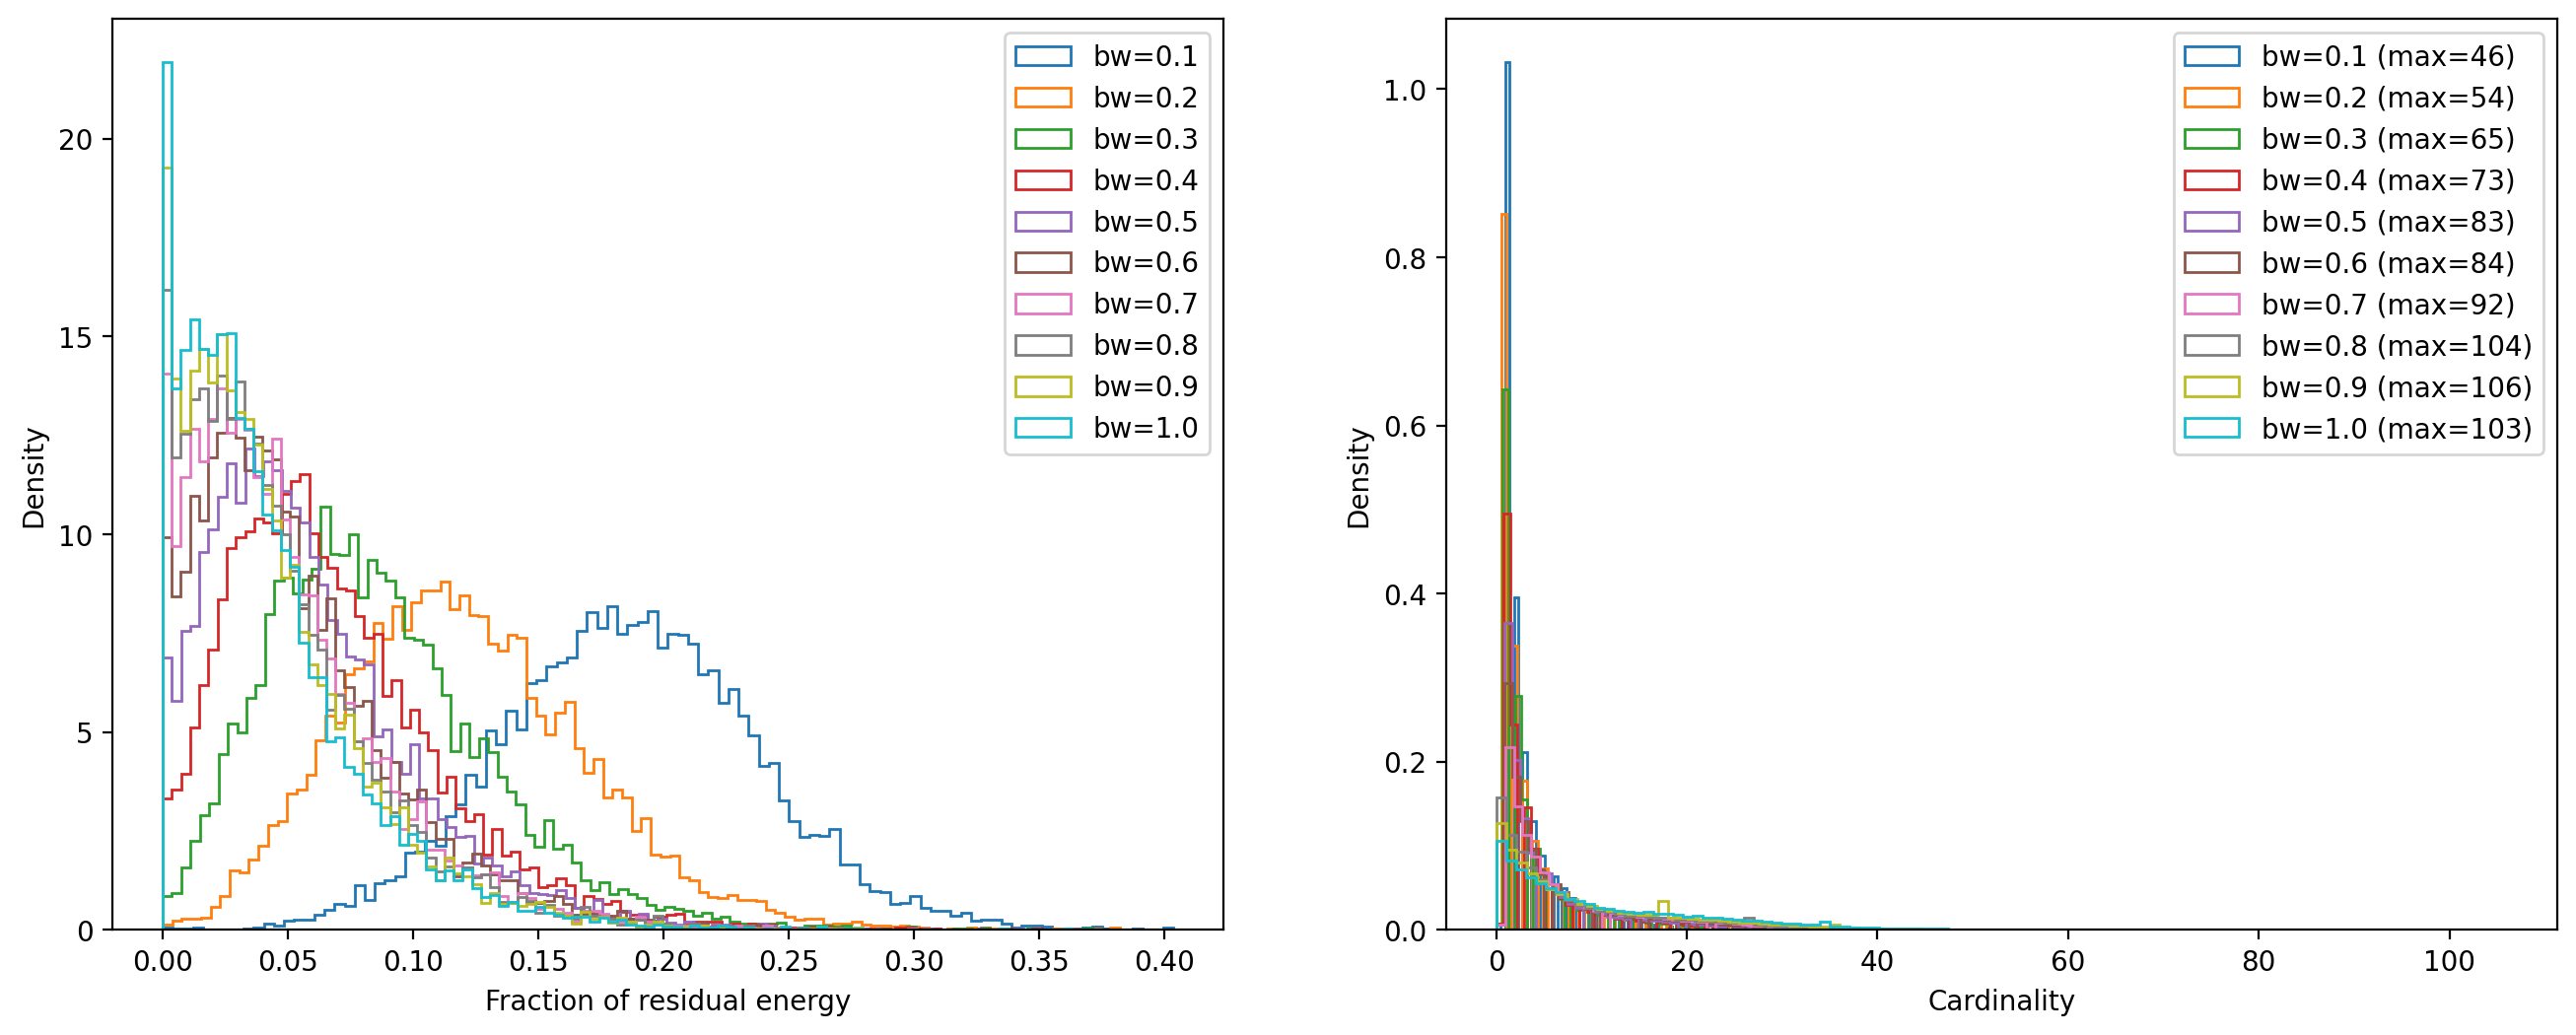

In [5]:
summaries = {}

fig = plt.figure(figsize=(16, 6), dpi=200)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

for bw in tqdm([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):

    fp = f'path to train_skim_seg_bw{bw}.root'
    tree = uproot.open(fp)['EventTree']

    particle_e = tree['particle_e'].array()
    particle_pdgid = tree['particle_pdgid'].array()
    event_number = tree['eventNumber'].array()
    res_mask = particle_pdgid == -999

    # segmented
    e_sum_all_seg = ak.sum(particle_e, axis=1)
    e_sum_res_seg = ak.sum(particle_e[res_mask], axis=1)

    # event level
    e_sum_all = []; e_sum_res = []; cardinality = []
    for evi in np.unique(event_number):
        m = event_number == evi
        e_sum_all.append(np.sum(e_sum_all_seg[m]))
        e_sum_res.append(np.sum(e_sum_res_seg[m]))

    e_sum_all = np.array(e_sum_all)
    e_sum_res = np.array(e_sum_res)
    e_sum_res_frac = e_sum_res / e_sum_all

    cardinality = ak.to_numpy(ak.count(particle_e, axis=1))

    ax1.hist(e_sum_res_frac, bins=100, histtype='step', label=f'bw={bw}', density=True)
    ax2.hist(cardinality, bins=100, histtype='step', label=f'bw={bw} (max={np.max(cardinality)})', density=True)

    # summaries
    frac_mean = np.mean(e_sum_res_frac)
    frac_std = np.std(e_sum_res_frac)
    frac_median = np.median(e_sum_res_frac)
    frac_iqr = np.percentile(e_sum_res_frac, 75) - np.percentile(e_sum_res_frac, 25)

    cardinality_mean = np.mean(cardinality)
    cardinality_std = np.std(cardinality)
    cardinality_median = np.median(cardinality)
    cardinality_iqr = np.percentile(cardinality, 75) - np.percentile(cardinality, 25)
    cardinality_95 = np.percentile(cardinality, 95)
    cardinality_97 = np.percentile(cardinality, 97)
    cardinality_99 = np.percentile(cardinality, 99)
    cardinality_99p5 = np.percentile(cardinality, 99.5)
    cardinality_99p9 = np.percentile(cardinality, 99.9)

    summaries[bw] = {
        'frac_mean': frac_mean,
        'frac_std': frac_std,
        'frac_median': frac_median,
        'frac_iqr': frac_iqr,
        'cardinality_mean': cardinality_mean,
        'cardinality_std': cardinality_std,
        'cardinality_median': cardinality_median,
        'cardinality_iqr': cardinality_iqr,
        'cardinality_max': np.max(cardinality),
        'cardinality_95': cardinality_95,
        'cardinality_97': cardinality_97,
        'cardinality_99': cardinality_99,
        'cardinality_99p5': cardinality_99p5,
        'cardinality_99p9': cardinality_99p9,
    }

ax1.legend()
ax1.set_xlabel('Fraction of residual energy')
ax1.set_ylabel('Density')
ax2.legend()
ax2.set_xlabel('Cardinality')
ax2.set_ylabel('Density')

In [6]:
summaries_percentage = {}
for bw, s in summaries.items():
    summaries_percentage[bw] = {
        'frac median %': s['frac_median']*100,
        'frac iqr %': s['frac_iqr']*100,
        'cardinality 95': s['cardinality_95'],
        'cardinality 97': s['cardinality_97'],
        'cardinality 99': s['cardinality_99'],
        'cardinality 99.5': s['cardinality_99p5'],
        'cardinality 99.9': s['cardinality_99p9'],
    }   

summaries_df = pd.DataFrame.from_dict(summaries_percentage, orient='index')
summaries_df.reset_index(inplace=True)  # Reset the index to turn it into a column
summaries_df.rename(columns={'index': 'bw'}, inplace=True)  # Rename the index column to 'bw'
pd.options.display.float_format = '{:.2f}'.format
summaries_df

,bw,frac median %,frac iqr %,cardinality 95,cardinality 97,cardinality 99,cardinality 99.5,cardinality 99.9
0,0.10,18.61,6.80,10.00,13.00,17.00,19.00,25.00
1,0.20,11.68,6.46,12.00,15.00,20.00,23.00,30.00
2,0.30,7.99,5.73,14.00,17.00,23.00,26.00,34.00
3,0.40,6.03,5.38,16.00,20.00,26.00,30.00,38.00
4,0.50,5.03,5.03,19.00,22.00,29.00,33.00,42.00
5,0.60,4.43,4.81,22.00,25.00,32.00,36.00,47.00
6,0.70,4.05,4.61,25.00,28.00,36.00,40.00,50.00
7,0.80,3.74,4.50,27.00,31.00,39.00,43.00,54.70
8,0.90,3.49,4.34,30.00,34.00,42.00,47.00,58.92
9,1.00,3.26,4.17,33.00,37.00,45.53,50.00,63.00


### Raw

In [7]:
fp_raw = 'patht to train_skim.root'
tree_raw = uproot.open(fp_raw)['Out_Tree']

particle_e_raw = tree_raw['particle_e'].array()

In [8]:
cardinality_raw = ak.to_numpy(ak.count(particle_e_raw, axis=1))
np.percentile(cardinality_raw, 99.9)

np.float64(158.0)

### Plot

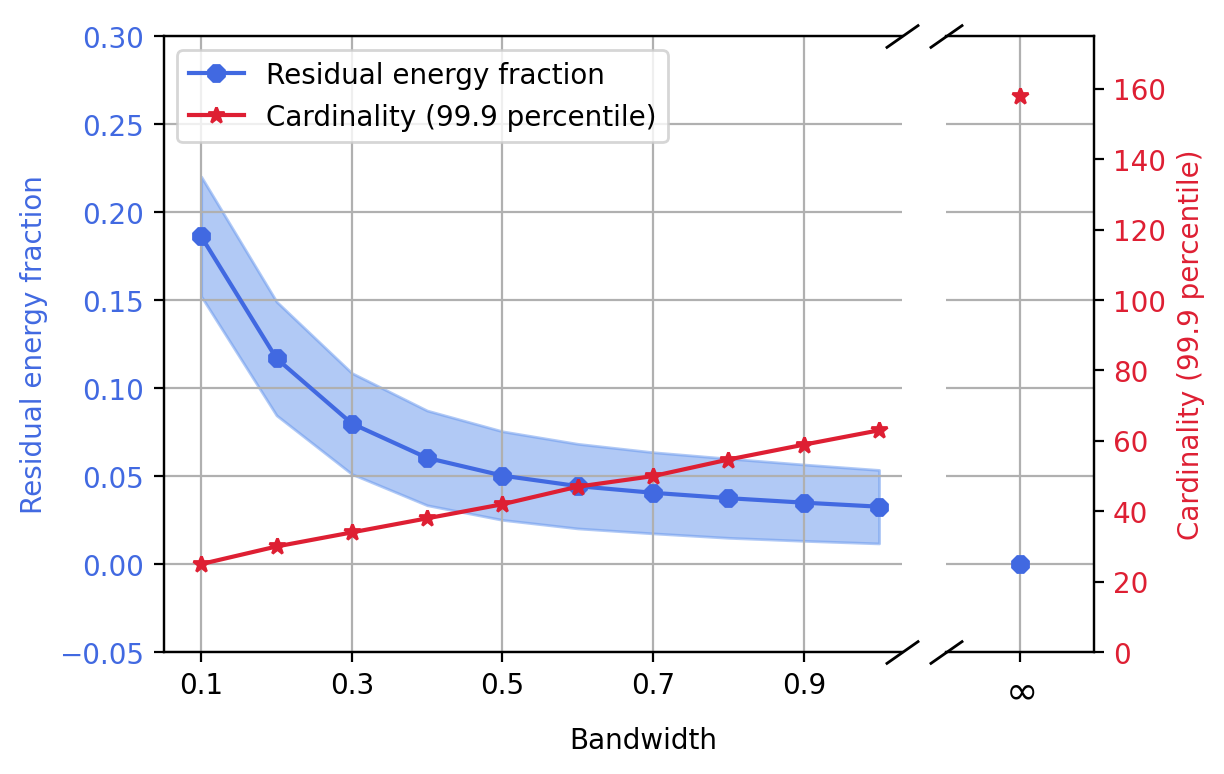

In [122]:
x = np.linspace(0.1, 1.0, 10)
y1_medians = summaries_df['frac median %'] * 1e-2
y1_iqrs = summaries_df['frac iqr %'] * 1e-2 * 0.5 # Half of the IQR
y2 = summaries_df['cardinality 99.9']

c1 = 'royalblue'; c2 = (0.87, 0.12, 0.2) # (0.67, 0.31, 0.39)
m1 = '8'; m2 = '*'

# Create the figure and the first y-axis
fig = plt.figure(figsize=(6, 4), dpi=200)
gs = fig.add_gridspec(1, 2, width_ratios=[5, 1], wspace=0.1)
ax1 = fig.add_subplot(gs[0])

# Plot on the left y-axis
ax1.fill_between(x, y1_medians-y1_iqrs, y1_medians+y1_iqrs, alpha=0.5, color='cornflowerblue')
ax1.plot(x, y1_medians, color=c1, label='Residual energy fraction', marker=m1)
ax1.set_xlabel('Bandwidth')
ax1.xaxis.set_label_coords(0.65, -0.12)
ax1.set_ylabel('Residual energy fraction', color=c1)
ax1.tick_params(axis='y', labelcolor=c1)
ax1.grid(True)

# Create the second y-axis
ax2 = ax1.twinx()  # This shares the same x-axis
ax2.plot(x, y2, color=c2, label='Cardinality (99.9 percentile)', marker=m2)

xticks = [0.1, 0.3, 0.5, 0.7, 0.9]
xtick_labels = [f'{xtick:.1f}' for xtick in xticks]
for ax in [ax1, ax2]:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# Add a single legend
ax1.legend(handles, labels, loc='upper left')



# right side plots
ax3 = fig.add_subplot(gs[1])
ax3.plot([0], [0], color=c1, marker=m1)
ax3.grid(True)

ax4 = ax3.twinx()
ax4.plot([0], [158], color=c2, marker=m2)
ax4.set_ylabel('Cardinality (99.9 percentile)', color=c2)
ax4.tick_params(axis='y', labelcolor=c2)

for ax in [ax3, ax4]:
    ax.set_xticks([0])  # Set the x-tick position
    ax.set_xticklabels(["$\infty$"], fontsize=14)  # Set the x-tick label to "∞"


for ax in [ax1, ax2]:
    ax.set_xlim(0.05, 1.03)

for ax in [ax1, ax3]:
    ax.set_ylim(-0.05, 0.3)
for ax in [ax2, ax4]:
    ax.set_ylim(0, 175)



# disable ticks
ax1.tick_params(right=False, labelright=False)  # Disable ticks and labels on the right for ax1
ax2.tick_params(right=False, labelright=False)  # Disable ticks and labels on the right for ax2
ax3.tick_params(left=False, labelleft=False)  # Disable ticks and labels on the right for ax2
ax4.tick_params(left=False, labelleft=False)  # Disable ticks and labels on the right for ax2

# disable spines
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax3.spines.left.set_visible(False)
ax4.spines.left.set_visible(False)

# ax3.yaxis.tick_right()
ax4.yaxis.tick_right()

d = .7  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)